### Los Angeles Neighbourhood analysis for setting up for Indian cuisine

#### Step I,  Importing Data Sets 


In [185]:
!pip install folium



In [186]:
import pandas as pd
import numpy as np


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium 


import types
from botocore.client import Config
import ibm_boto3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures 
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures

print('Libraries imported.')

Libraries imported.


In [187]:
# The code was removed by Watson Studio for sharing.

In [188]:
Census_Tract.dtypes

GEOID            object
Tract            object
Tract Number      int64
Neighborhood     object
Location         object
Latitude        float64
Longitude       float64
dtype: object

In [189]:
Census_unique=Census_Tract.drop_duplicates(subset=['Neighborhood'])

In [190]:
Census_unique.shape

(262, 7)

In [191]:
Census_unique.head(5)

,GEOID,Tract,Tract Number,Neighborhood,Location,Latitude,Longitude
0,1400000US06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",101110,Tujunga,"(34.2595555, -118.293602)",34.259555,-118.293602
6,1400000US06037102103,"Census Tract 1021.03, Los Angeles County, Cali...",102103,Shadow Hills,"(34.224155, -118.354339)",34.224155,-118.354339
8,1400000US06037102105,"Census Tract 1021.05, Los Angeles County, Cali...",102105,Sun Valley,"(34.210852, -118.3480495)",34.210852,-118.348050
10,1400000US06037103101,"Census Tract 1031.01, Los Angeles County, Cali...",103101,Sunland,"(34.274431, -118.30714)",34.274431,-118.307140
12,1400000US06037103200,"Census Tract 1032, Los Angeles County, California",103200,Lake View Terrace,"(34.2745565, -118.3439025)",34.274557,-118.343902


In [192]:
Total_Population.head(5)

,Policy Area,Dataset,Variable,Year,Count,Tract,Tract Number,Neighborhood,GEOID,Location,Row ID,Date
0,Demography,Total Population,Total Population,2010,5017.0,Census Tract 1011.10,101110,Tujunga,1400000US06037101110,"(34.25947853, -118.29299909)",Total_Population_2010_1400000US06037101110,01/01/2010
1,Demography,Total Population,Total Population,2010,3663.0,Census Tract 1011.22,101122,Tujunga,1400000US06037101122,"(34.26772618, -118.29015869)",Total_Population_2010_1400000US06037101122,01/01/2010
2,Demography,Total Population,Total Population,2010,6799.0,Census Tract 1012.10,101210,Tujunga,1400000US06037101210,"(34.25297726, -118.29074307)",Total_Population_2010_1400000US06037101210,01/01/2010
3,Demography,Total Population,Total Population,2010,3189.0,Census Tract 1012.20,101220,Tujunga,1400000US06037101220,"(34.25161333, -118.28164445)",Total_Population_2010_1400000US06037101220,01/01/2010
4,Demography,Total Population,Total Population,2010,3808.0,Census Tract 1013,101300,Tujunga,1400000US06037101300,"(34.24878243, -118.27101097)",Total_Population_2010_1400000US06037101300,01/01/2010


In [193]:
population_pivot=Total_Population.pivot_table(values='Count',index=['Neighborhood'],columns=['Year'],aggfunc=np.sum)
population_pivot = population_pivot.reset_index()
Population_pivot_sorted=population_pivot.sort_values(2018,ascending = False).groupby('Neighborhood').head(1)
Population_pivot_sorted_top10=Population_pivot_sorted.head(10)
Population_pivot_sorted_top10.set_index('Neighborhood', inplace=True)
Population_pivot_sorted_top10.head(10)

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018
Neighborhood,,,,,,,,,
Long Beach,464491.0,465074.0,466201.0,468083.0,471080.0,473084.0,471985.0,472459.0,470990.0
Glendale,191089.0,190718.0,191166.0,193381.0,195380.0,196984.0,197895.0,199750.0,200372.0
Santa Clarita,179009.0,181304.0,184743.0,186384.0,188369.0,190484.0,191708.0,188889.0,190304.0
Palmdale,151700.0,154477.0,157437.0,159248.0,161374.0,162318.0,162126.0,163077.0,162358.0
Lancaster,149533.0,150851.0,153858.0,154872.0,155839.0,156540.0,156585.0,156735.0,155605.0
Pomona,149201.0,149368.0,149928.0,150448.0,151825.0,152022.0,152353.0,152802.0,152823.0
Torrance,143951.0,144622.0,145443.0,146187.0,147181.0,147589.0,147307.0,147190.0,146392.0
Pasadena,138295.0,138719.0,138961.0,139878.0,140781.0,141632.0,141931.0,143113.0,143173.0
East Los Angeles,120507.0,121422.0,124140.0,124858.0,124869.0,122557.0,121361.0,120896.0,117348.0


Text(0.5, 0, 'neighbourhood')

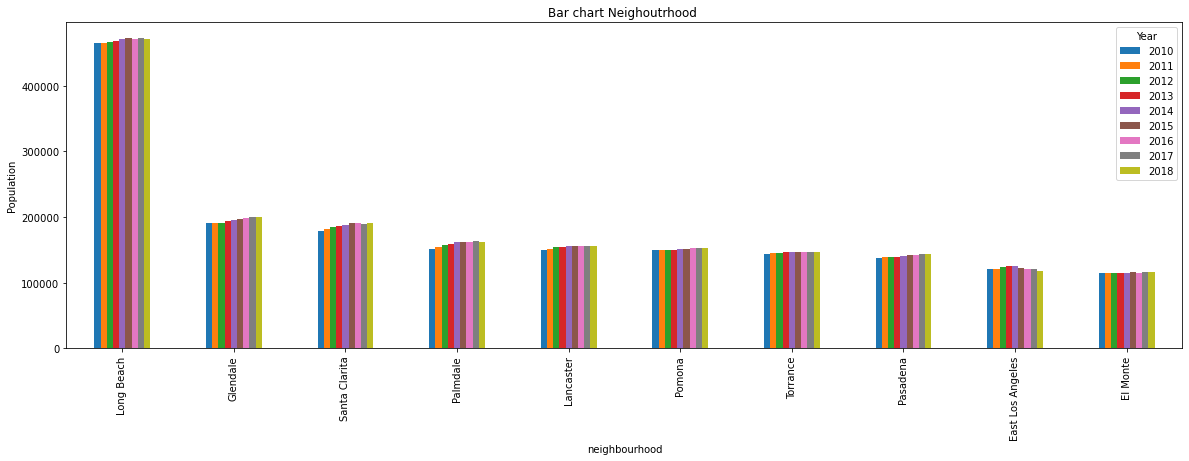

In [194]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

Population_pivot_sorted_top10.plot(kind='bar', figsize=(20, 6),)

plt.title('Bar chart Neighoutrhood ')
plt.ylabel('Population')
plt.xlabel("neighbourhood")


In [195]:
Area_Income.head(5)

,Policy_Area,Dataset,Variable,Year,Count,Percent,Tract,tractnumber,neighborhood,GEOID,location,Row_ID,Date,Denominator,Denominator_Description
0,Employment & Income,Area Income Limits,Extremely Low Income Households,2013,365.0,21.661720,Census Tract 1011.10,101110,Tujunga,1400000US06037101110,"(34.25947853, -118.29299909)",Extremely_Low_Income_Households_2013_1400000US...,01/01/2013 12:00:00 AM,1685.0,Total Households
1,Employment & Income,Area Income Limits,Low Income Households,2013,310.0,18.397627,Census Tract 1011.10,101110,Tujunga,1400000US06037101110,"(34.25947853, -118.29299909)",Low_Income_Households_2013_1400000US06037101110,01/01/2013 12:00:00 AM,1685.0,Total Households
2,Employment & Income,Area Income Limits,Very Low Income Households,2013,215.0,12.759644,Census Tract 1011.10,101110,Tujunga,1400000US06037101110,"(34.25947853, -118.29299909)",Very_Low_Income_Households_2013_1400000US06037...,01/01/2013 12:00:00 AM,1685.0,Total Households
3,Employment & Income,Area Income Limits,Middle Income Households,2013,200.0,11.869436,Census Tract 1011.10,101110,Tujunga,1400000US06037101110,"(34.25947853, -118.29299909)",Middle_Income_Households_2013_1400000US0603710...,01/01/2013 12:00:00 AM,1685.0,Total Households
4,Employment & Income,Area Income Limits,Above Middle Income Households,2013,595.0,35.311573,Census Tract 1011.10,101110,Tujunga,1400000US06037101110,"(34.25947853, -118.29299909)",Above_Middle_Income_Households_2013_1400000US0...,01/01/2013 12:00:00 AM,1685.0,Total Households


In [224]:
Area_Income_pivot_sorted=Area_Income_pivot_sorted[Area_Income_pivot_sorted.Variable.str.contains("Above Middle Income Households")]
merged=Area_Income_pivot_sorted.merge(df2, on="neighborhood")
merged.drop(["Variable_y","Variable_x"],axis = 1,inplace=True)
merged.columns=['neighborhood', '2013', '2014', '2015', '2016','2016_Above_Middle_income_percenrage']
merged.sort_values('2016_Above_Middle_income_percenrage',ascending = False)

,neighborhood,2013,2014,2015,2016,2016_Above_Middle_income_percenrage
232,Rolling Hills,514.0,519.0,545.0,545.0,85.156250
108,Palos Verdes Estates,3810.0,3770.0,3805.0,3805.0,79.023884
88,La Canada Flintridge,5095.0,5040.0,4910.0,4895.0,77.403542
49,Pacific Palisades,7429.0,7539.0,7675.0,7580.0,77.291730
112,Beverly Crest,3525.0,3510.0,3620.0,3700.0,77.019151
191,Beverlywood,1060.0,1110.0,1090.0,1080.0,76.595745
180,Stevenson Ranch,1425.0,1435.0,1415.0,1350.0,76.271186
148,Bel-Air,2470.0,2365.0,2240.0,2235.0,75.252525
24,Manhattan Beach,10880.0,10805.0,10335.0,10295.0,74.579832
60,Hermosa Beach,6690.0,6750.0,6650.0,6790.0,73.812371


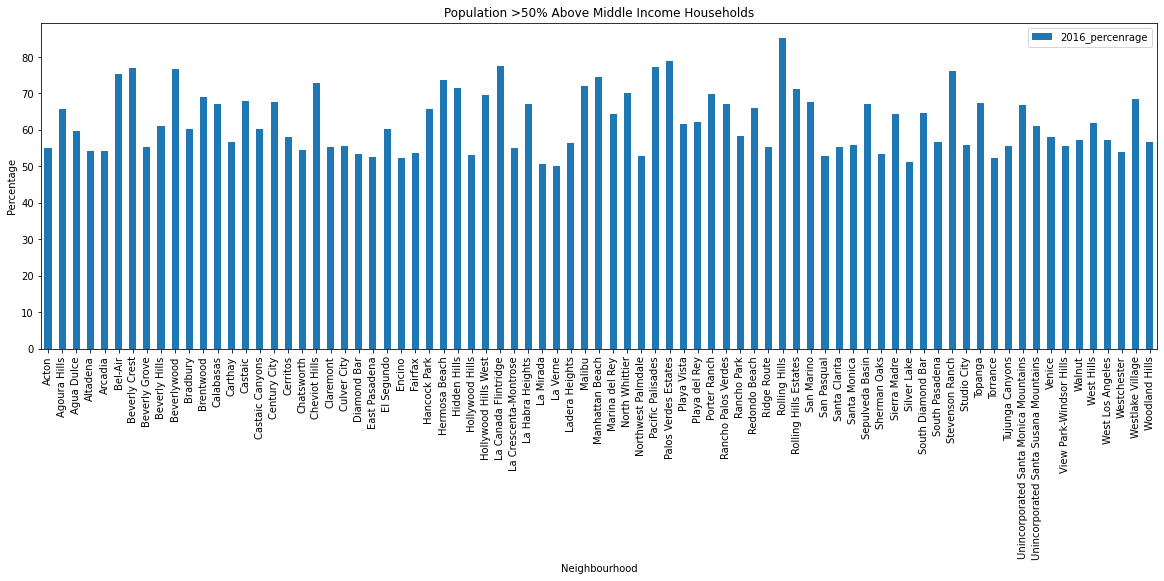

In [207]:
chart1=df3.copy()
chart1.drop(['Variable'], axis=1, inplace=True)
chart1.set_index('neighborhood', inplace=True)
chart2=chart1.copy()
chart2.plot(kind='bar', figsize=(20, 6),)
plt.title('Population >50% Above Middle Income Households') # add a title to the histogram
plt.ylabel('Percentage') # add y-label
plt.xlabel('Neighbourhood') # add x-label

plt.show()

In [208]:

Population_pivot_sorted_top10.reset_index()
top10_populationlist=Population_pivot_sorted_top10.index.to_list()

income_megered_top10=df3[df3.neighborhood.apply(lambda sentence: any(word in sentence for word in top10_populationlist))]
income_megered_top10.head()

,neighborhood,Variable,2016_percenrage
325,East Pasadena,Above Middle Income Households,52.525253
770,Northwest Palmdale,Above Middle Income Households,52.887538
940,Santa Clarita,Above Middle Income Households,55.301492
1010,South Pasadena,Above Middle Income Households,56.686332
1080,Torrance,Above Middle Income Households,52.391324
